In [ ]:
%pip install pdf2image
%pip install python-dateutil

In [ ]:
from textractor import Textractor

In [ ]:
region_name = "eu-west-3"
profile_name = "dev-laf-sbx"

file_path = "s3://ds-tests-laf-s3-data-01/dag_nao/03-AppelsOffre-anonyme/2023DOS0550696 - Technicien Support Utilisateurs/ao_sncf/REC-technicien _support_utilisateurs.pdf"

extractor = Textractor(profile_name=profile_name)

# Words

In [ ]:
document_text = extractor.start_document_text_detection(file_path)
document_text.text

In [ ]:
document_text

In [ ]:
print(vars(document_text))

In [ ]:
document_text.words.visualize()[0]

In [ ]:
doc_text = document_text.text
print(doc_text)
len(doc_text)

# Words and Tables

In [ ]:
from textractor.data.constants import TextractFeatures

document_analysis = extractor.start_document_analysis(
    file_source=file_path,
    features=[TextractFeatures.LAYOUT, TextractFeatures.TABLES],
    save_image=True,
)

In [ ]:
print(vars(document_analysis))

In [ ]:
document_analysis.tables.visualize()

# DOCX

In [ ]:
cv = "/workspace/data/03-AppelsOffre-anonyme/2023DOS0550696 - Technicien Support Utilisateurs/offres_techniques/CONSORT_FRANCE-1209686/CV-SBE.docx"
prop_tech = "/workspace/data/03-AppelsOffre-anonyme/2023DOS0550696 - Technicien Support Utilisateurs/offres_techniques/CONSORT_FRANCE-1209686/proposition_technique.docx"

In [ ]:
document_text = extractor.start_document_text_detection(cv, s3_upload_path="s3://ds-tests-laf-s3-data-01/dag_nao/")

In [ ]:
print(vars(document_text))

In [ ]:
document_text.words.visualize()[0]

# Excel

start_document_analysis

In [78]:
bpu = "/workspace/data/03-AppelsOffre-anonyme/2023DOS0550696 - Technicien Support Utilisateurs/offres_financieres/AMARIS_FRANCE-1482764/BPU-technicien_support_utilisateurs.xlsx"
bpu_pdf = "/workspace/data/03-AppelsOffre-anonyme/2023DOS0550696 - Technicien Support Utilisateurs/offres_financieres/AMARIS_FRANCE-1482764/BPU-technicien_support_utilisateurs.pdf"

extractor = Textractor(profile_name="dev-laf-sbx")

docu = extractor.start_document_analysis(
    file_source=bpu_pdf,
    features=[TextractFeatures.TABLES],
    s3_upload_path="s3://ds-tests-laf-s3-data-01/dag_nao/"
)

In [96]:
print(vars(docu))

{'job_id': '410d2d20cbf6d66f91c58e0b2f2ba88a25e1efc58621473418157d8756428e80', '_api': <TextractAPI.ANALYZE: 1>, '_textract_client': <botocore.client.Textract object at 0xffff728d1f90>, '_document': This document holds the following data:
Pages - 1
Words - 138
Lines - 59
Key-values - 0
Checkboxes - 0
Tables - 2
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 0, '_images': [<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339 at 0xFFFF73323C10>], '_output_config': None, '_s3_polling_interval': 1, '_textract_polling_interval': 5}


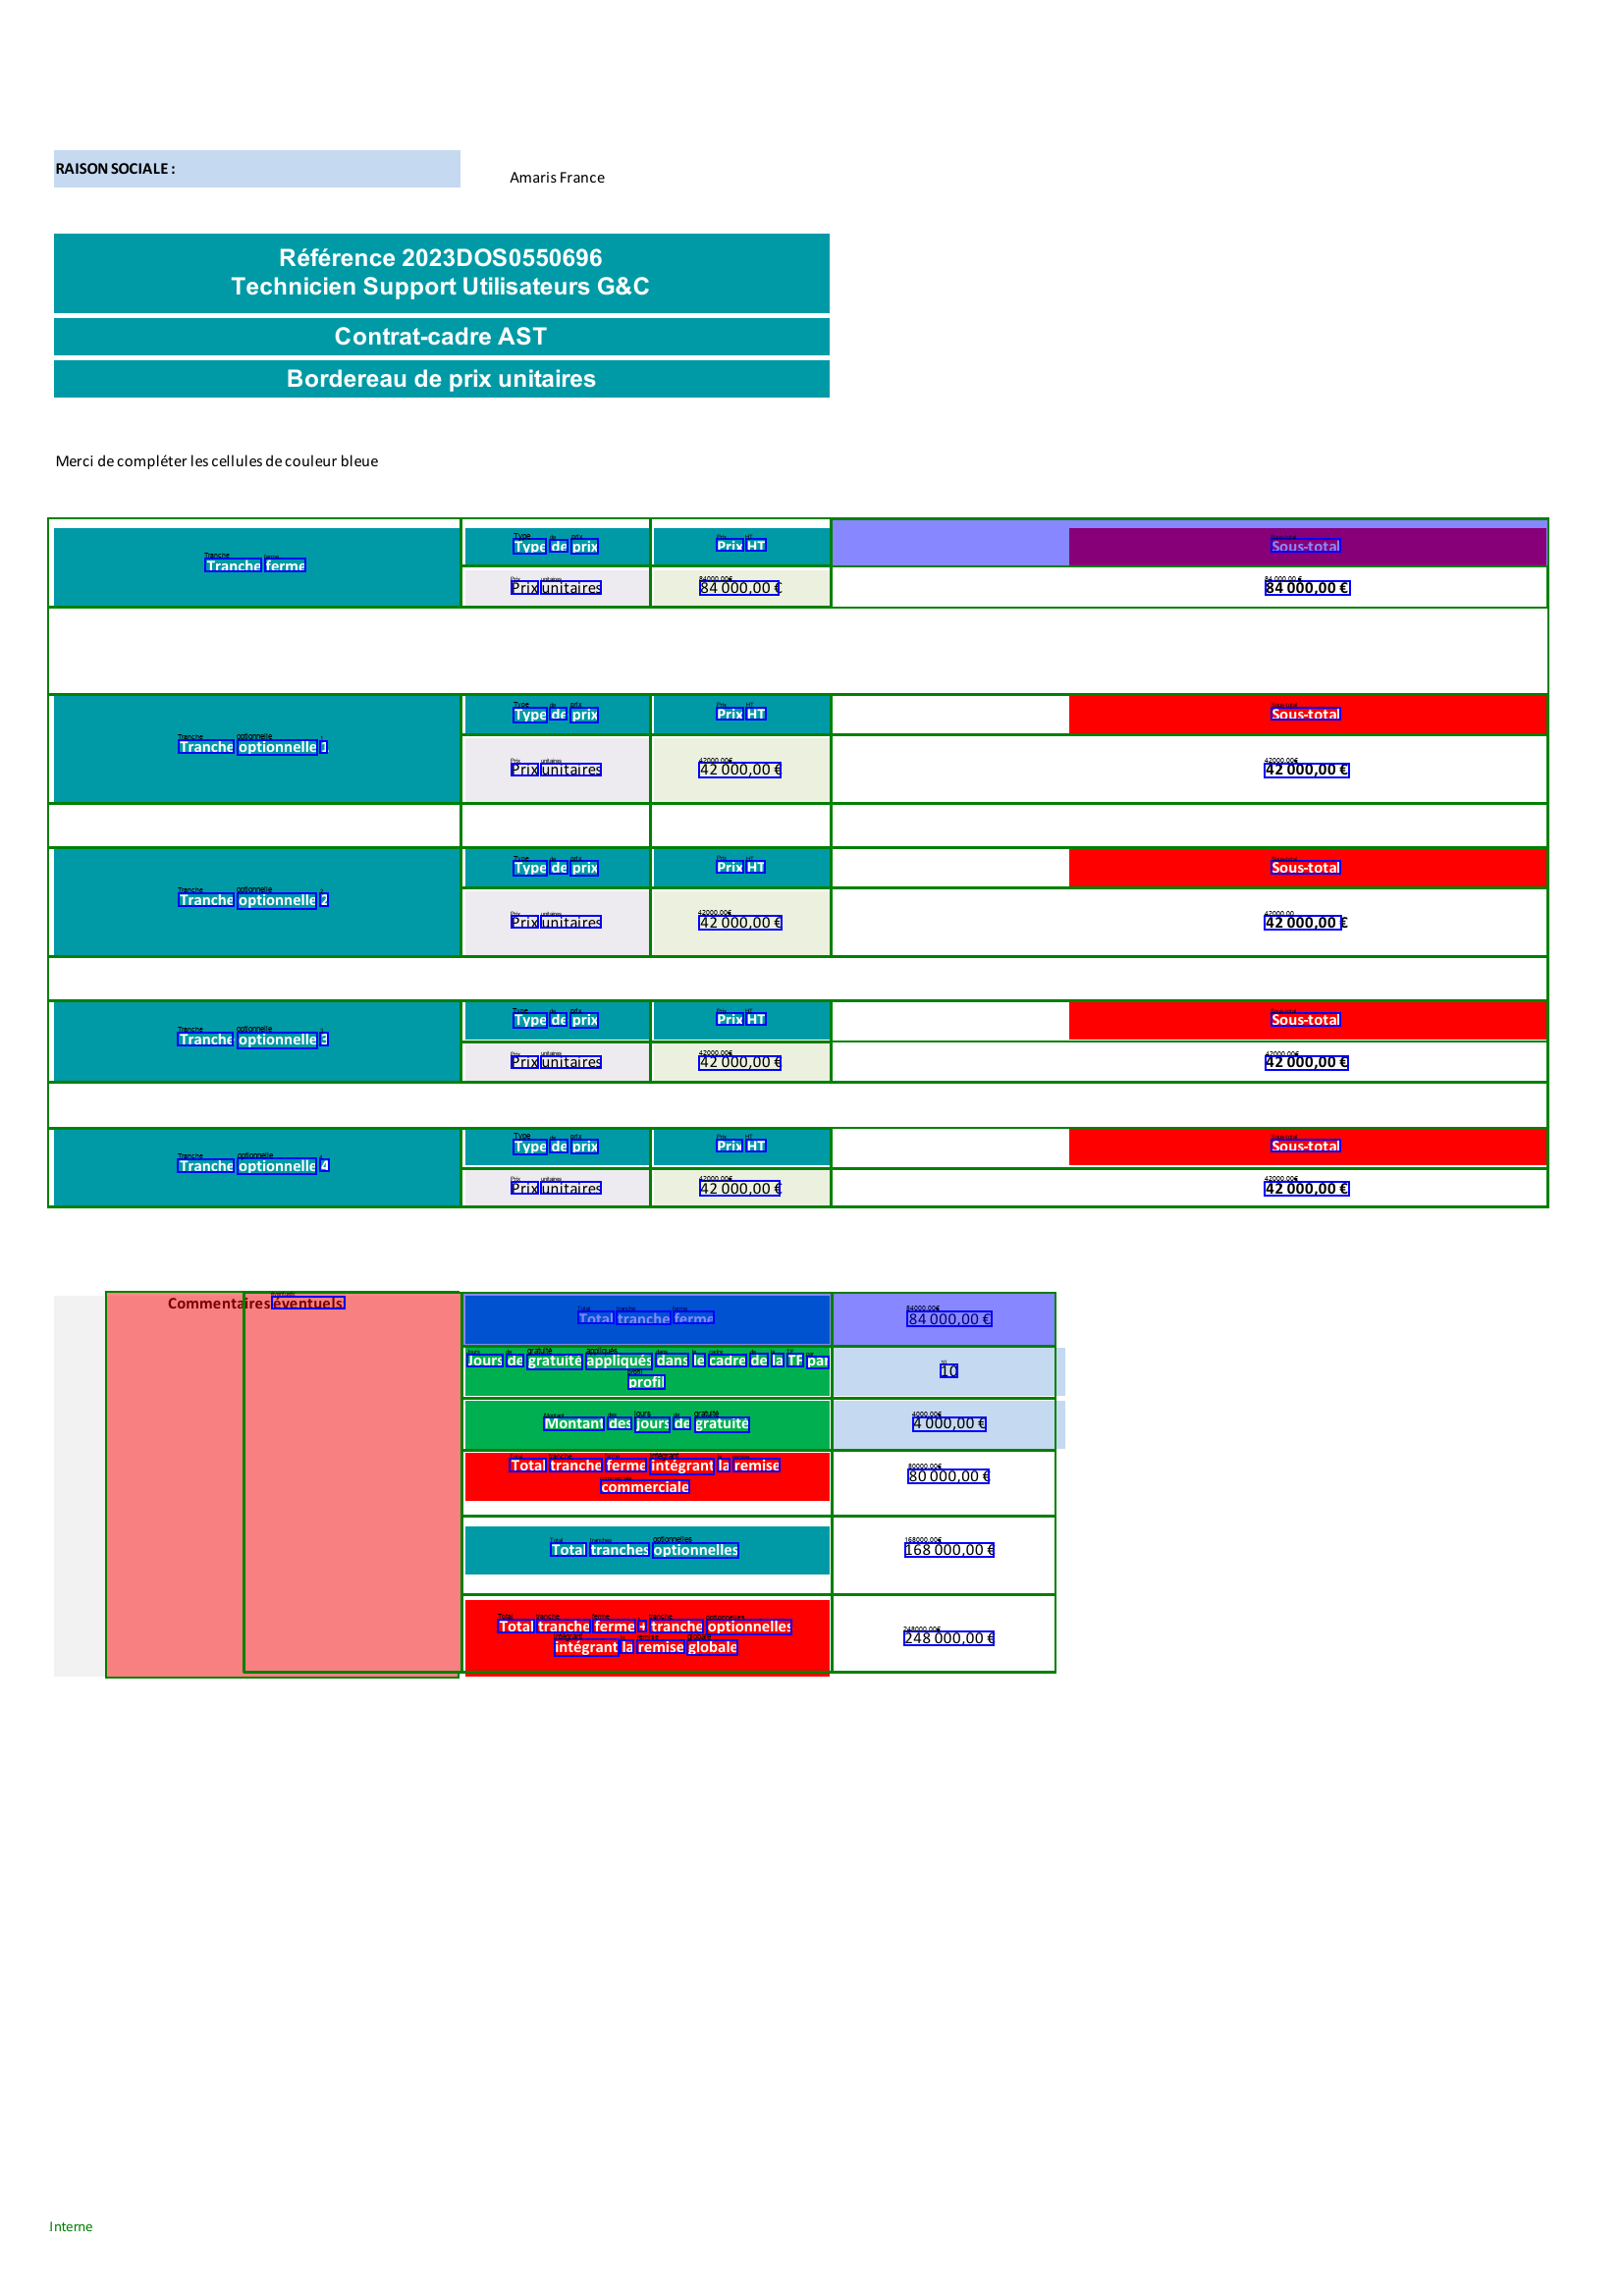

In [82]:
docu.tables.visualize()

In [94]:
from textractor.data.text_linearization_config import TextLinearizationConfig

table_aware_text = docu.tables[0].get_text(
    TextLinearizationConfig(
        table_linearization_format='markdown'
    )
)

In [95]:
print(table_aware_text)

| 0                     | 1              | 2         | 3           |
|-----------------------|----------------|-----------|-------------|
| Tranche ferme         | Type de prix   | Prix HT   | Sous-total  |
|                       | Prix unitaires | 84000,00€ | 84 000,00 € |
|                       |                |           |             |
| Tranche optionnelle 1 | Type de prix   | Prix HT   | Sous-total  |
|                       | Prix unitaires | 42000,00€ | 42000,00€   |
|                       |                |           |             |
| Tranche optionnelle 2 | Type de prix   | Prix HT   | Sous-total  |
|                       | Prix unitaires | 42000,00€ | 42000,00    |
|                       |                |           |             |
| Tranche optionnelle 3 | Type de prix   | Prix HT   | Sous-total  |
|                       | Prix unitaires | 42000,00€ | 42000,00€   |
|                       |                |           |             |
| Tranche optionnelle 4 | Type de 

| 0          | 1                                                                      | 2          |
|------------|------------------------------------------------------------------------|------------|
| éventuels: | Total tranche ferme                                                    | 84000,00€  |
|            | Jours de gratuité appliqués dans le cadre de la TF par profil          | 10         |
|            | Montant des jours de gratuité                                          | 4000,00€   |
|            | Total tranche ferme intégrant la remise commerciale                    | 80000,00€  |
|            | Total tranches optionnelles                                            | 168000,00€ |
|            | Total tranche ferme + tranche optionnelles intégrant la remise globale | 248000,00€ |

In [117]:
table_aware_text_merged = docu.tables[0].get_text(
    TextLinearizationConfig(
        table_linearization_format='markdown',
        table_duplicate_text_in_merged_cells=True
    )
)

In [118]:
print(table_aware_text_merged)

| 0                     | 1              | 2         | 3           |
|-----------------------|----------------|-----------|-------------|
| Tranche ferme         | Type de prix   | Prix HT   | Sous-total  |
| Tranche ferme         | Prix unitaires | 84000,00€ | 84 000,00 € |
|                       |                |           |             |
| Tranche optionnelle 1 | Type de prix   | Prix HT   | Sous-total  |
| Tranche optionnelle 1 | Prix unitaires | 42000,00€ | 42000,00€   |
|                       |                |           |             |
| Tranche optionnelle 2 | Type de prix   | Prix HT   | Sous-total  |
| Tranche optionnelle 2 | Prix unitaires | 42000,00€ | 42000,00    |
|                       |                |           |             |
| Tranche optionnelle 3 | Type de prix   | Prix HT   | Sous-total  |
| Tranche optionnelle 3 | Prix unitaires | 42000,00€ | 42000,00€   |
|                       |                |           |             |
| Tranche optionnelle 4 | Type de 

In [121]:
flatten_headers = docu.tables[0].get_text(
    TextLinearizationConfig(
        table_linearization_format='markdown',
        table_flatten_headers=True,
        table_duplicate_text_in_merged_cells=True
    )
)

In [122]:
print(flatten_headers)

| 0                     | 1              | 2         | 3           |
|-----------------------|----------------|-----------|-------------|
| Tranche ferme         | Type de prix   | Prix HT   | Sous-total  |
| Tranche ferme         | Prix unitaires | 84000,00€ | 84 000,00 € |
|                       |                |           |             |
| Tranche optionnelle 1 | Type de prix   | Prix HT   | Sous-total  |
| Tranche optionnelle 1 | Prix unitaires | 42000,00€ | 42000,00€   |
|                       |                |           |             |
| Tranche optionnelle 2 | Type de prix   | Prix HT   | Sous-total  |
| Tranche optionnelle 2 | Prix unitaires | 42000,00€ | 42000,00    |
|                       |                |           |             |
| Tranche optionnelle 3 | Type de prix   | Prix HT   | Sous-total  |
| Tranche optionnelle 3 | Prix unitaires | 42000,00€ | 42000,00€   |
|                       |                |           |             |
| Tranche optionnelle 4 | Type de 

In [98]:
bpu_pdf2 = "/workspace/data/03-AppelsOffre-anonyme/2023DOS0550696 - Technicien Support Utilisateurs/offres_financieres/AMARIS_FRANCE-1482764/BPU-technicien_support_utilisateursTJM.pdf"

docu2 = extractor.start_document_analysis(
    file_source=bpu_pdf2,
    features=[TextractFeatures.TABLES],
    s3_upload_path="s3://ds-tests-laf-s3-data-01/dag_nao/"
)

{'job_id': '8230b0753e7a653480d5e9e1d1b9e340d639c5e28458e3ecfea97688bdecaf99', '_api': <TextractAPI.ANALYZE: 1>, '_textract_client': <botocore.client.Textract object at 0xffff728d1f90>, '_document': None, '_images': [<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0xFFFF6BA3C690>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0xFFFF6BA3C390>], '_output_config': None, '_s3_polling_interval': 1, '_textract_polling_interval': 5}


In [107]:
print(vars(docu2))

{'job_id': '8230b0753e7a653480d5e9e1d1b9e340d639c5e28458e3ecfea97688bdecaf99', '_api': <TextractAPI.ANALYZE: 1>, '_textract_client': <botocore.client.Textract object at 0xffff728d1f90>, '_document': This document holds the following data:
Pages - 2
Words - 143
Lines - 38
Key-values - 0
Checkboxes - 0
Tables - 6
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 0, '_images': [<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0xFFFF6BA3C690>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0xFFFF6BA3C390>], '_output_config': None, '_s3_polling_interval': 1, '_textract_polling_interval': 5}


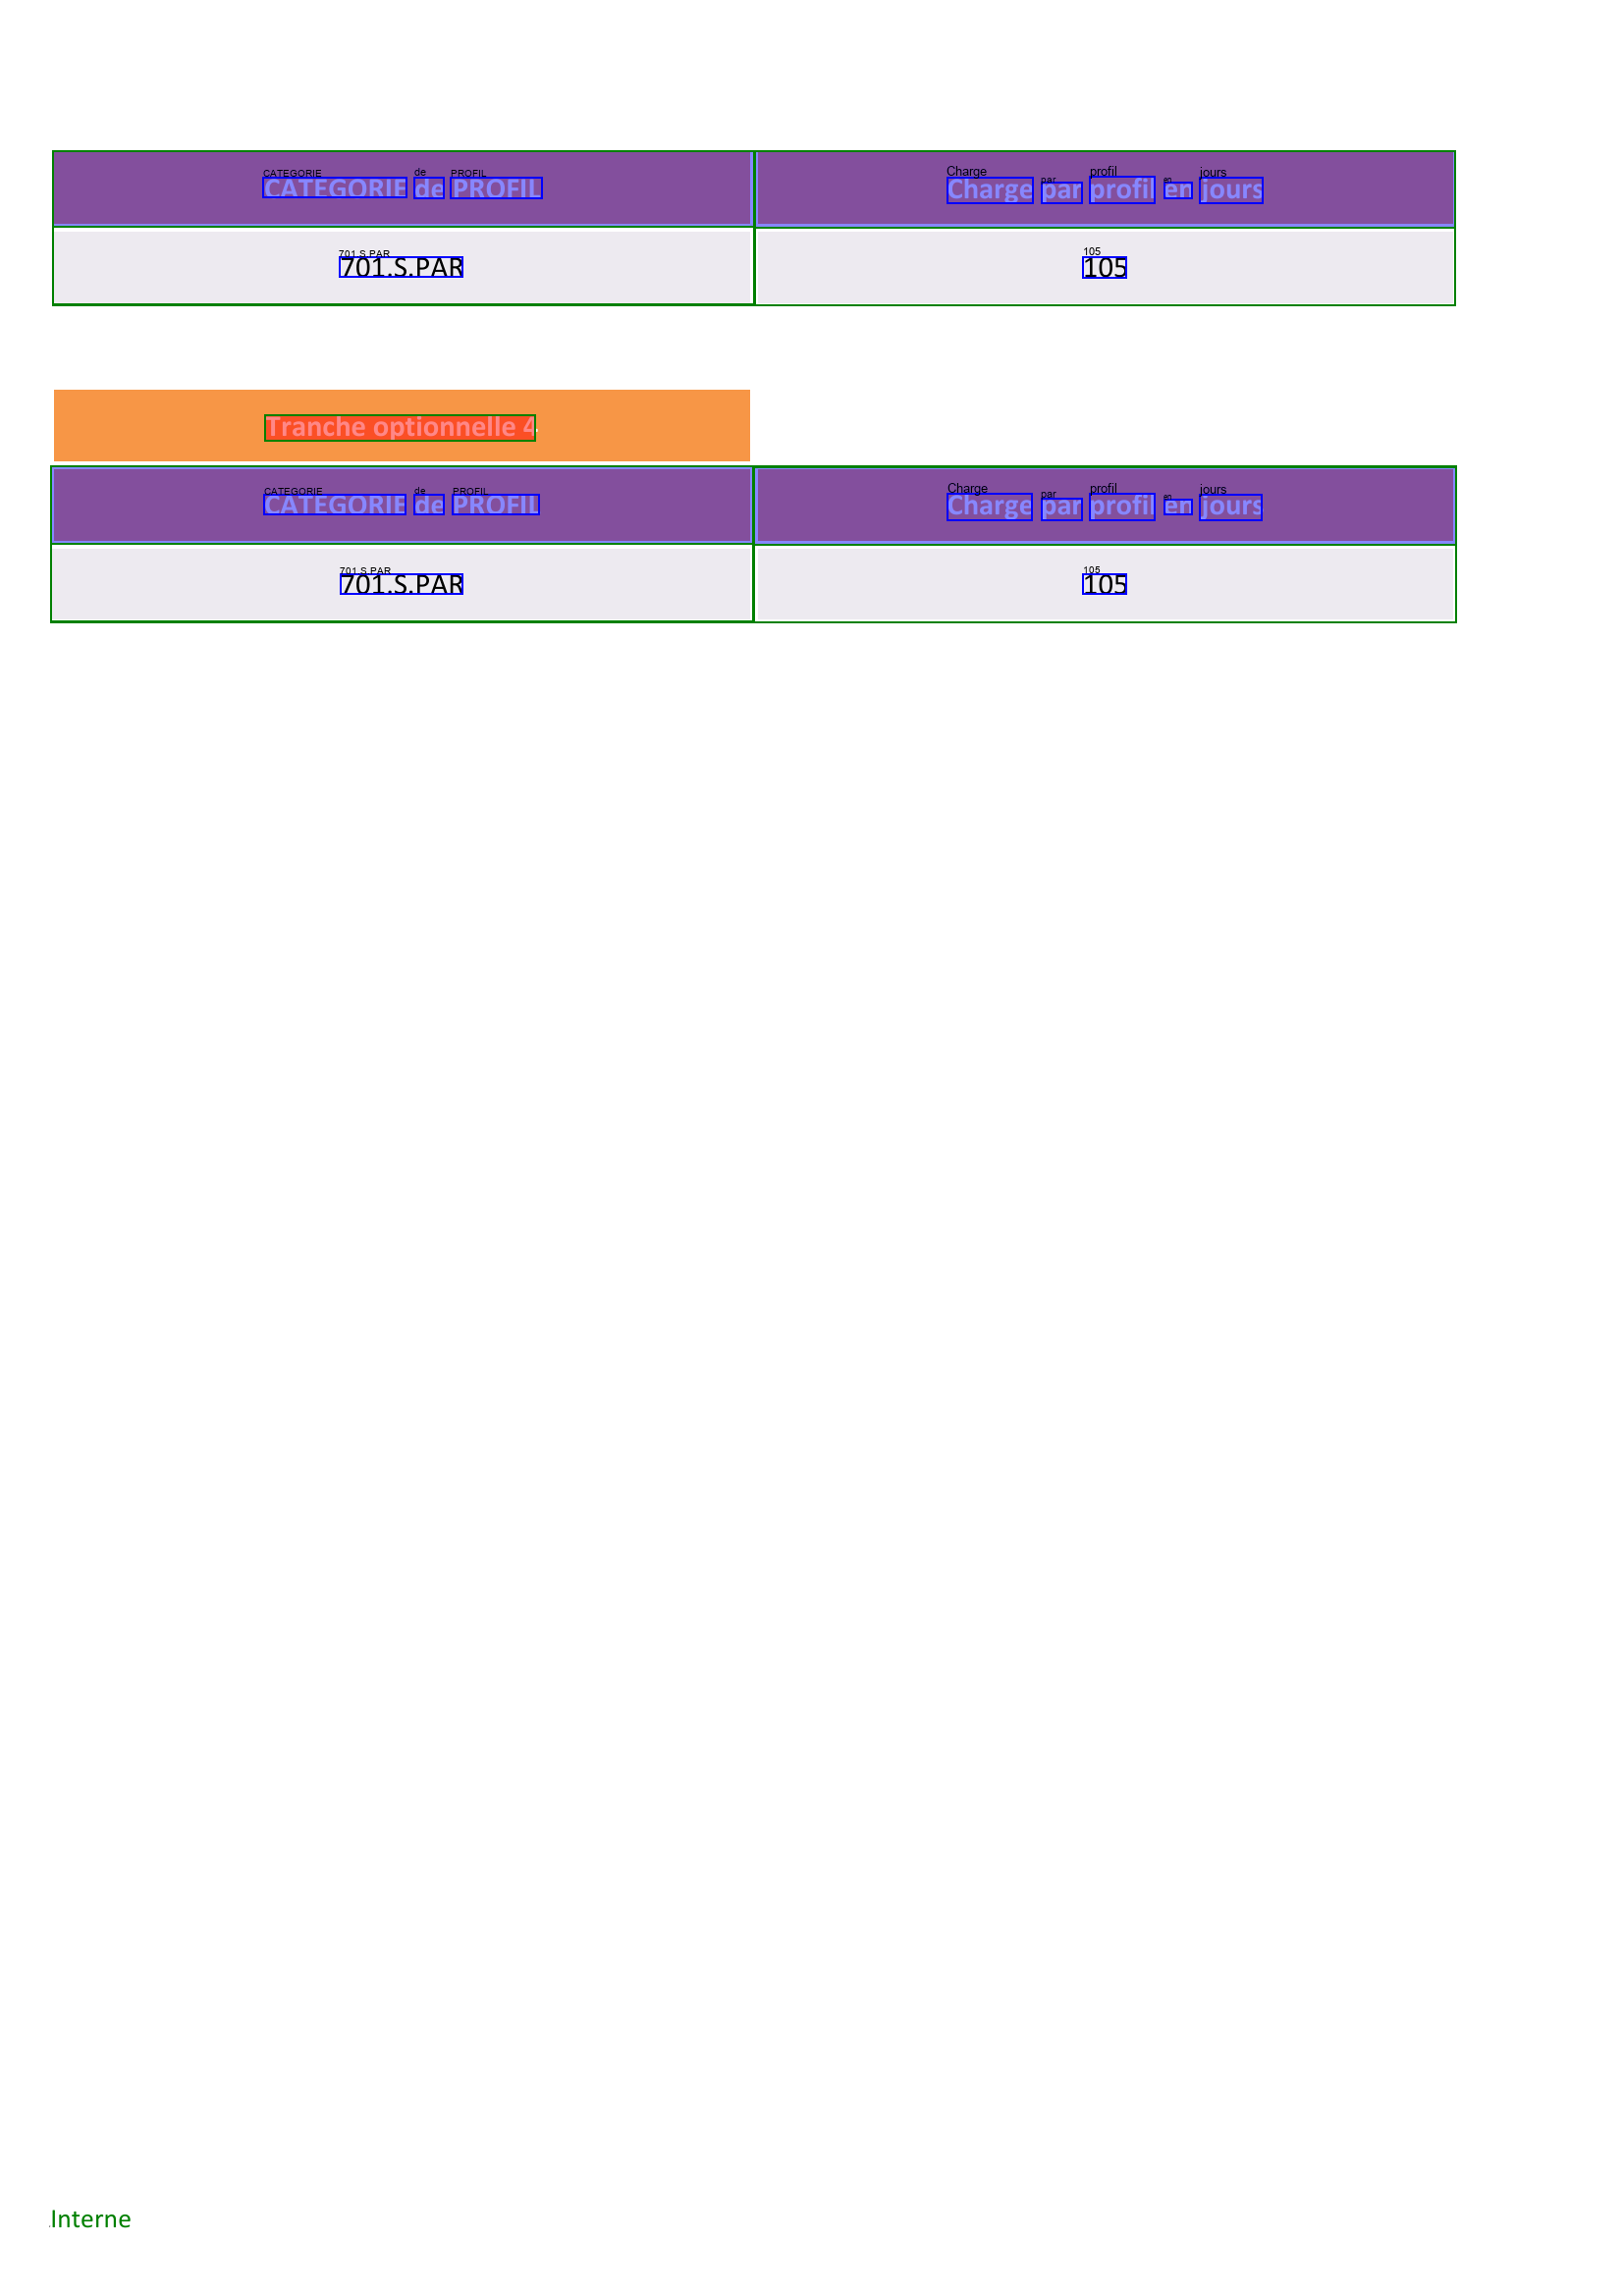

In [112]:
docu2.tables.visualize()[1]

In [114]:
table_aware_text = docu2.tables[0].get_text(TextLinearizationConfig(table_linearization_format='markdown'))
print(table_aware_text)

| CATEGORIE de PROFIL    | TAUX JOURNALIERS (€ HTVA)    |
|------------------------|------------------------------|
| 701.S.PAR              | 400,00                       |


In [115]:
type(table_aware_text)

str

analyse_expanse

In [ ]:
document = extractor.analyze_expense(
    file_source=bpu_pdf,
    save_image=True,
)

In [ ]:
document.visualize(with_words=False)


In [ ]:
document

In [ ]:
from textractor.data.constants import AnalyzeExpenseFields, AnalyzeExpenseFieldsGroup, AnalyzeExpenseLineItemFields

expense_doc = document.expense_documents[0]
expense_doc

In [ ]:
expense_doc.summary_fields

In [ ]:
expense_doc.summary_groups

In [ ]:
expense_doc.line_items_groups